In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

plt.style.use('seaborn')

In [56]:
np.random.seed(1990)
e = np.random.normal(size=500)
t = np.arange(500)

In [57]:
yt = []
yt.append(2 + e[0])
for i in range(1,500):
    yt.append(2 + 0.6*i + 0.7*yt[i-1] + e[i])
yt=pd.Series(yt)
yt.index = pd.date_range("01-01-2022","15-05-2023",freq='D')

c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '15-05-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


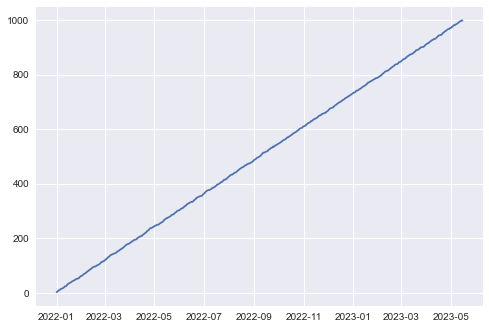

In [58]:
plt.plot(yt)

# Simple Exponential Smoothing

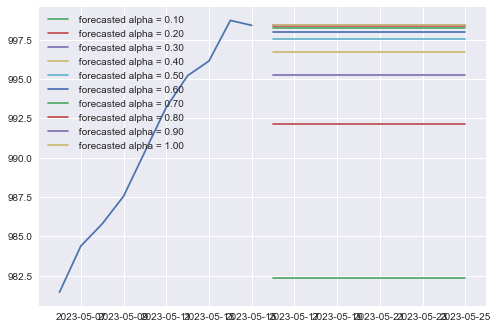

In [59]:
Fitted =[]
alpha = np.linspace(0.1,1,10,True)
beta = np.linspace(0.1,1,10,True)
plt.plot(yt[490:])
for a in alpha:
    SES = SimpleExpSmoothing(yt).fit(a,optimized=False,use_brute=False)
    Fitted.append(SES.fittedvalues)
    Forecast = SES.forecast(10)
    plt.plot(Forecast,label=" forecasted alpha = {:.2f}".format(a))
plt.legend()

In [60]:
PMSE = [np.mean((yt-Fitted[i])**2) for i in range(10)]

In [61]:
PMSE

[390.2175971851506,
 100.08339874086813,
 45.37559693585776,
 26.068800087151313,
 17.083916885794455,
 12.187433206709768,
 9.233886437231424,
 7.324171714112481,
 6.027892106547826,
 5.11853143482383]

PMSE therefore decreases as alpha increases for simple exponential smoothing

# Double / Holt's Exponential Smoothing

In [62]:
Fitted =[]
for a in alpha:
    arr=[]
    for b in beta:
        ES = Holt(yt,initialization_method='heuristic').fit(smoothing_level=a, smoothing_trend=b, optimized=False)
        arr.append(ES.fittedvalues)
    Fitted.append(arr)

In [63]:
PMSE = [[np.mean((yt-Fitted[i][j])**2) for j in range(10)] for i in range(10)]
print("minimum PMSE from given parameters:",np.min(PMSE))
best = np.where(PMSE == np.min(PMSE))
HES_best = Holt(yt,initialization_method='heuristic').fit(smoothing_level=alpha[best[0][0]], smoothing_trend=beta[best[1][0]], optimized=False)
HES_optimal = Holt(yt,initialization_method='estimated').fit()
print("Corresponding to: Alpha={:.1f}, Beta={:.1f}".format(alpha[best[0][0]],beta[best[1][0]]))
print("Optimised PMSE:",np.mean((yt-HES_optimal.fittedvalues)**2))
print("Corresponding to: Alpha={:.2f}, Beta={:.2f}".format(HES_optimal.params['smoothing_level'],HES_optimal.params['smoothing_trend']))

minimum PMSE from given parameters: 1.2044406095480442
Corresponding to: Alpha=0.8, Beta=0.1
Optimised PMSE: 1.1030383041083105
Corresponding to: Alpha=0.80, Beta=0.00


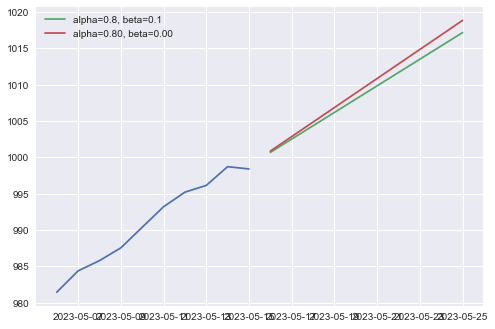

In [64]:
plt.plot(yt[490:])
plt.plot(HES_best.forecast(10),label = "alpha={:.1f}, beta={:.1f}".format(HES_best.params["smoothing_level"],HES_best.params["smoothing_trend"]))
plt.plot(HES_optimal.forecast(10),label = "alpha={:.2f}, beta={:.2f}".format(HES_optimal.params["smoothing_level"],HES_optimal.params["smoothing_trend"]))
plt.legend()
plt.show()

# Damped Holt Exp Smoothing

In [65]:
Fitted =[]
for a in alpha:
    arr=[]
    for b in beta:
        DHES = Holt(yt,initialization_method='estimated',damped_trend=True).fit(smoothing_level=a, smoothing_trend=b)
        arr.append(DHES.fittedvalues)
    Fitted.append(arr)

In [66]:
PMSE = [[np.mean((yt-Fitted[i][j])**2) for j in range(10)] for i in range(10)]
print("minimum PMSE from given parameters:",np.min(PMSE))
best = np.where(PMSE == np.min(PMSE))
DHES_best = Holt(yt,initialization_method='estimated',damped_trend=True).fit(smoothing_level=alpha[best[0][0]], smoothing_trend=beta[best[1][0]])
DHES_optimal = Holt(yt,initialization_method='estimated',damped_trend=True).fit()
print("Corresponding to: Alpha={:.1f}, Beta={:.1f} and Damping of:{:.4f}".format(alpha[best[0][0]],beta[best[1][0]],DHES_best.params['damping_trend']))
print("Optimised PMSE:",np.mean((yt-DHES_optimal.fittedvalues)**2))
print("Corresponding to: Alpha={:.2f}, Beta={:.2f}, Damp={:.4f}".format(DHES_optimal.params['smoothing_level'],DHES_optimal.params['smoothing_trend'],DHES_optimal.params['damping_trend']))

minimum PMSE from given parameters: 1.2119791873666184
Corresponding to: Alpha=0.8, Beta=0.1 and Damping of:0.9950
Optimised PMSE: 1.1946720421716424
Corresponding to: Alpha=0.84, Beta=0.06, Damp=0.9950


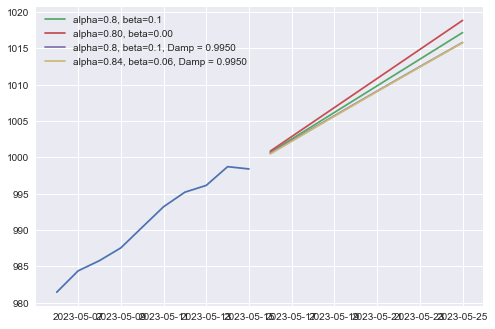

In [67]:
plt.plot(yt[490:])
plt.plot(HES_best.forecast(10),label = "alpha={:.1f}, beta={:.1f}".format(HES_best.params["smoothing_level"],HES_best.params["smoothing_trend"]))
plt.plot(HES_optimal.forecast(10),label = "alpha={:.2f}, beta={:.2f}".format(HES_optimal.params["smoothing_level"],HES_optimal.params["smoothing_trend"]))
plt.plot(DHES_best.forecast(10),label = "alpha={:.1f}, beta={:.1f}, Damp = {:.4f}".format(DHES_best.params["smoothing_level"],DHES_best.params["smoothing_trend"],DHES_best.params["damping_trend"]))
plt.plot(DHES_optimal.forecast(10),label = "alpha={:.2f}, beta={:.2f}, Damp = {:.4f}".format(DHES_optimal.params["smoothing_level"],DHES_optimal.params["smoothing_trend"],DHES_optimal.params["damping_trend"]))
plt.legend()
plt.show()

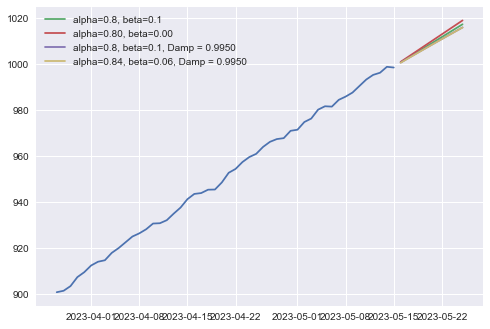

In [68]:
plt.plot(yt[450:])
plt.plot(HES_best.forecast(10),label = "alpha={:.1f}, beta={:.1f}".format(HES_best.params["smoothing_level"],HES_best.params["smoothing_trend"]))
plt.plot(HES_optimal.forecast(10),label = "alpha={:.2f}, beta={:.2f}".format(HES_optimal.params["smoothing_level"],HES_optimal.params["smoothing_trend"]))
plt.plot(DHES_best.forecast(10),label = "alpha={:.1f}, beta={:.1f}, Damp = {:.4f}".format(DHES_best.params["smoothing_level"],DHES_best.params["smoothing_trend"],DHES_best.params["damping_trend"]))
plt.plot(DHES_optimal.forecast(10),label = "alpha={:.2f}, beta={:.2f}, Damp = {:.4f}".format(DHES_optimal.params["smoothing_level"],DHES_optimal.params["smoothing_trend"],DHES_optimal.params["damping_trend"]))
plt.legend()
plt.show()